In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combine=[train_df,test_df]

print(train_df.columns.values)

train_df.head()

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
train_df.nunique().sort_values(ascending=True)

Alley            2
Street           2
Utilities        2
CentralAir       2
MasVnrType       3
              ... 
1stFlrSF       753
BsmtUnfSF      780
GrLivArea      861
LotArea       1073
Id            1460
Length: 81, dtype: int64

In [6]:
train_df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

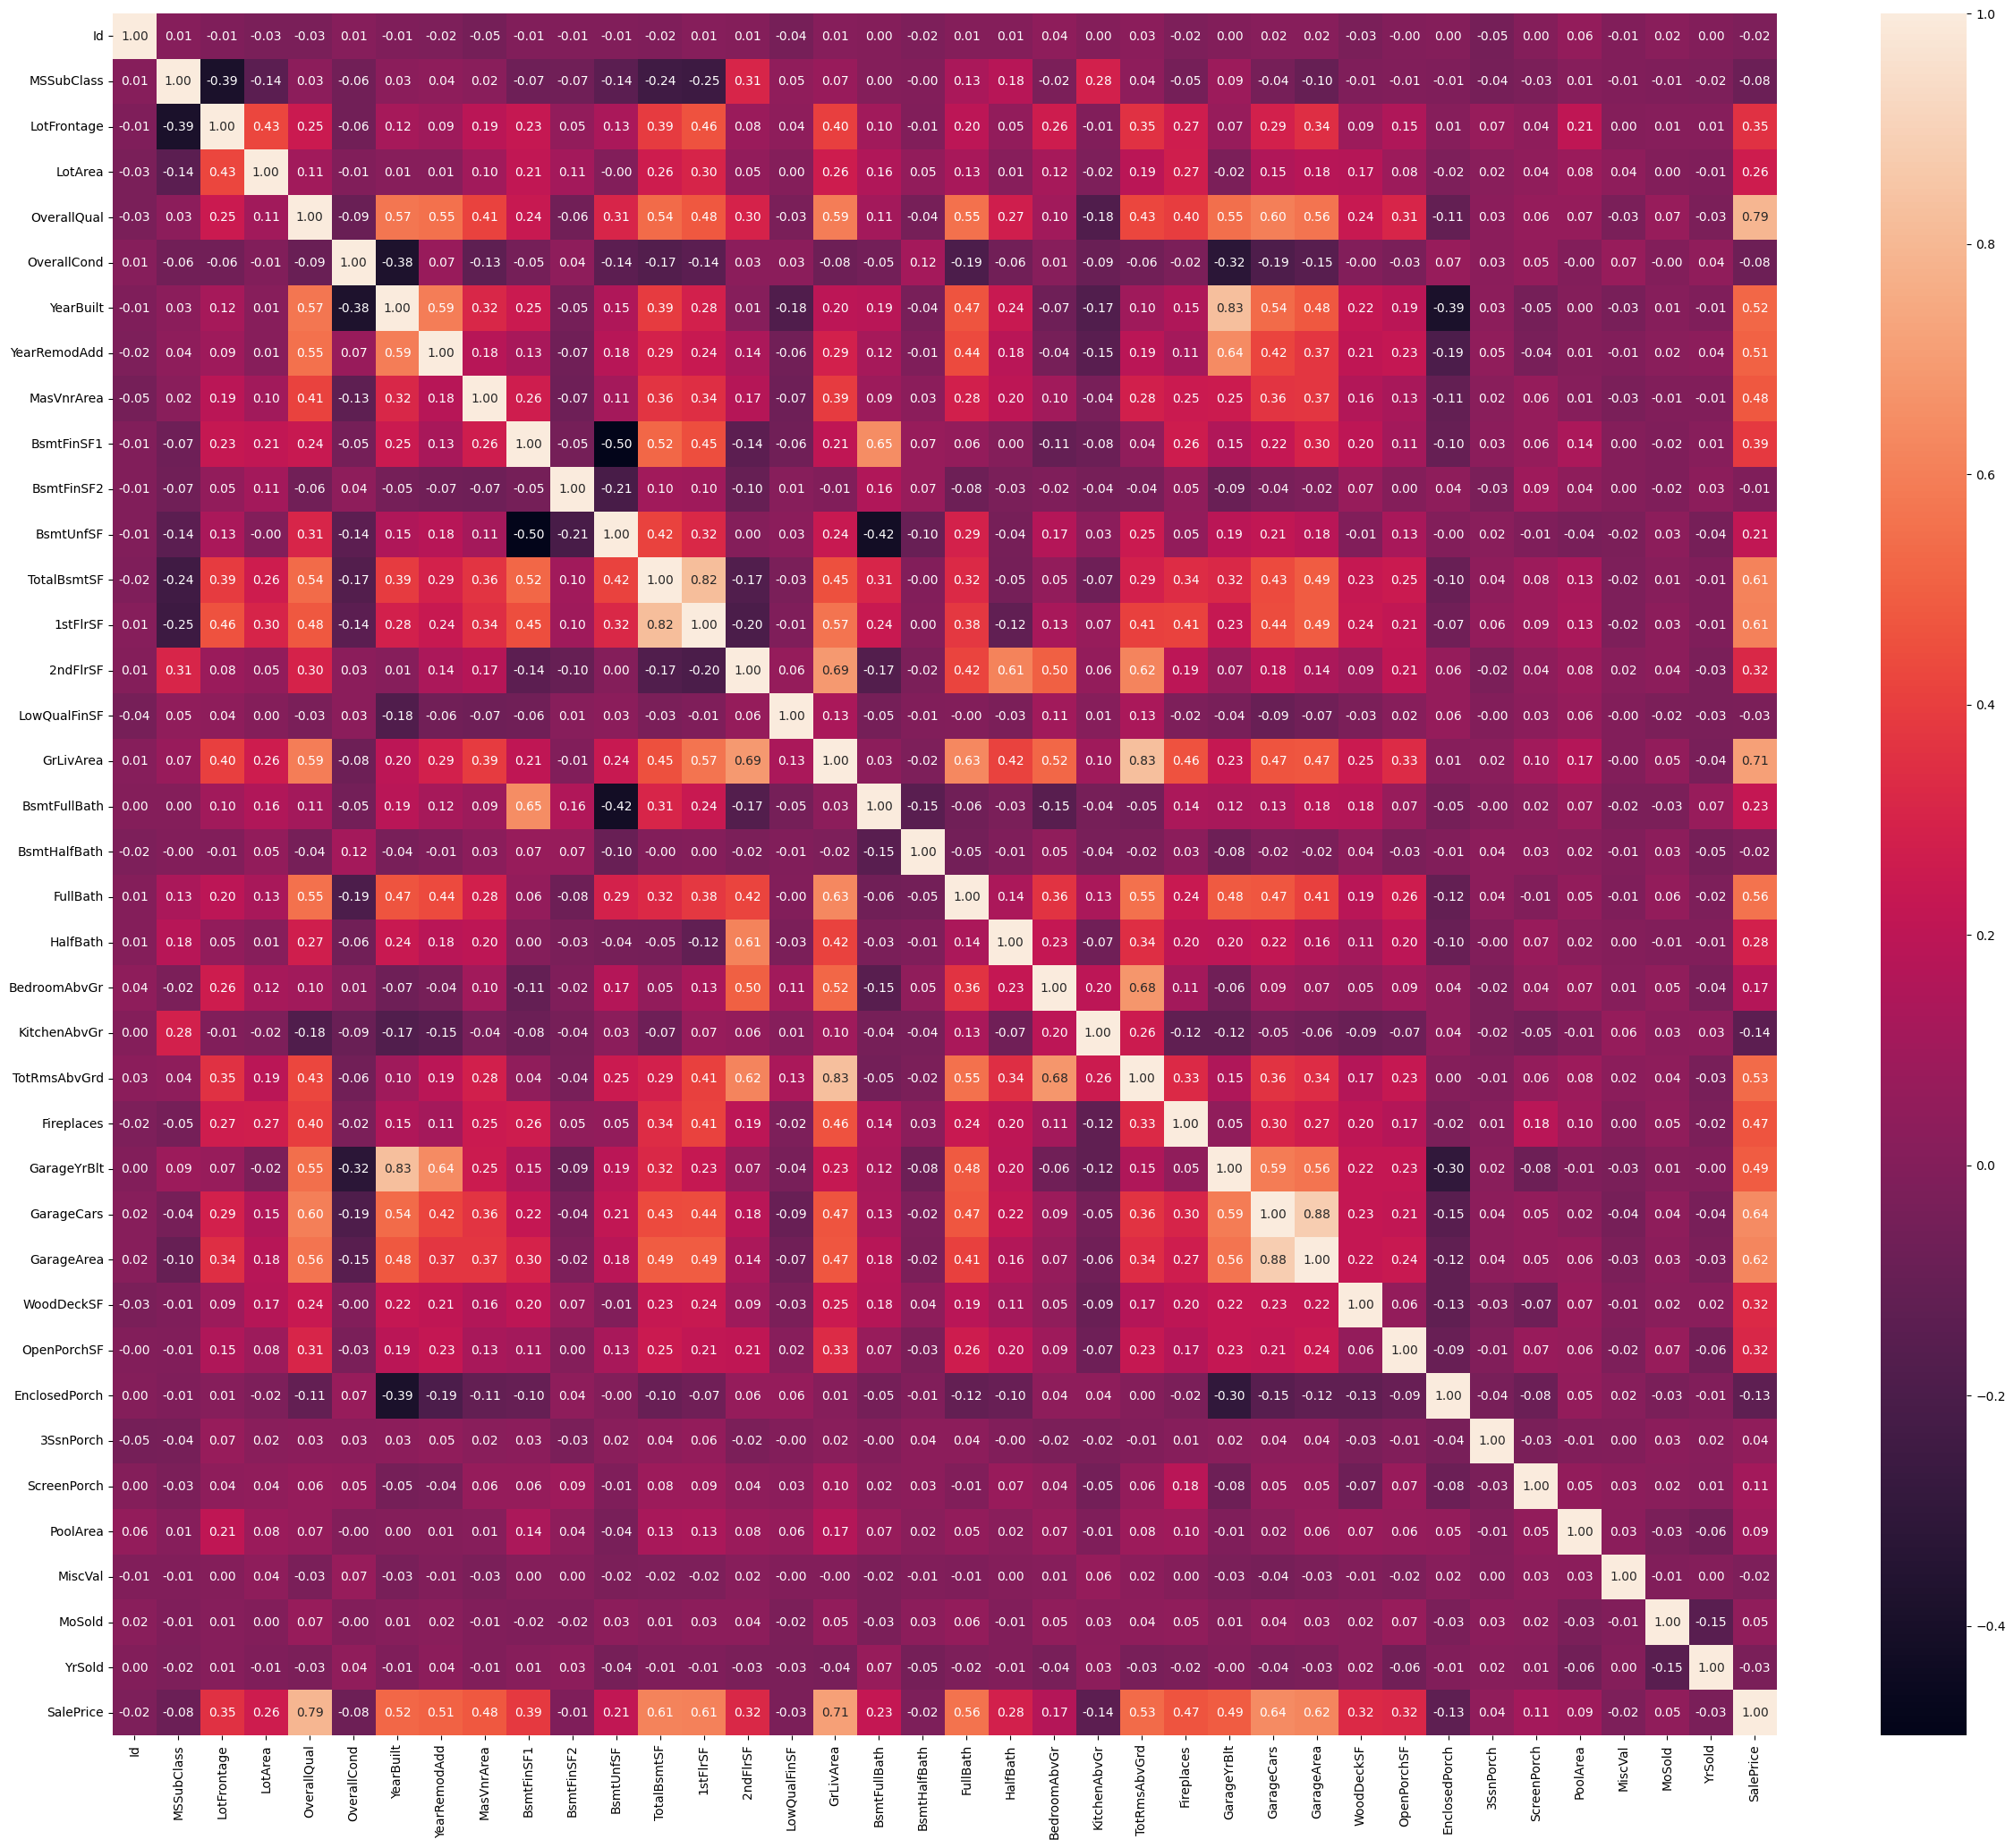

In [7]:
plt.figure(figsize=(30,25))
sns.heatmap(train_df.select_dtypes(exclude='O').corr(), annot=True, fmt='.2f')
plt.show()


# Non numerical attributes exploration

In [8]:
train_df.describe(include='O').T.sort_values(by='count',ascending=True)

,count,unique,top,freq
PoolQC,7,3,Gd,3
MiscFeature,54,4,Shed,49
Alley,91,2,Grvl,50
Fence,281,4,MnPrv,157
MasVnrType,588,3,BrkFace,445
FireplaceQu,770,5,Gd,380
GarageCond,1379,5,TA,1326
GarageQual,1379,5,TA,1311
GarageFinish,1379,3,Unf,605
GarageType,1379,6,Attchd,870


We can drop PoolQC column because too few count

In [9]:
for dataset in combine:
    dataset.drop('PoolQC', axis=1, inplace=True)

We can also drop MiscFeature :

In [10]:
combine[0].groupby(['MiscFeature']).agg({'SalePrice':'mean','MiscFeature':'size'})

,SalePrice,MiscFeature
MiscFeature,,
Gar2,170750.000000,2
Othr,94000.000000,2
Shed,151187.612245,49
TenC,250000.000000,1


In [11]:
for dataset in combine:
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('Nothing')
    dataset['MiscFeature'] = dataset['MiscFeature'].apply(lambda x: 0 if x == "Nothing" else 1)

combine[0].groupby(['MiscFeature']).agg({'SalePrice':'mean','MiscFeature':'size'})

,SalePrice,MiscFeature
MiscFeature,,
0,182046.410384,1406
1,151623.944444,54


In [12]:
for dataset in combine:
    dataset.drop('MiscFeature', axis=1, inplace=True)

In [13]:
combine[0]['Alley'] = combine[0]['Alley'].fillna('Nothing')
combine[0].groupby(['Alley']).agg({'SalePrice':'mean','Alley':'size'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,Alley
Alley,,
Nothing,183452.131483,1369
Pave,168000.585366,41
Grvl,122219.080000,50


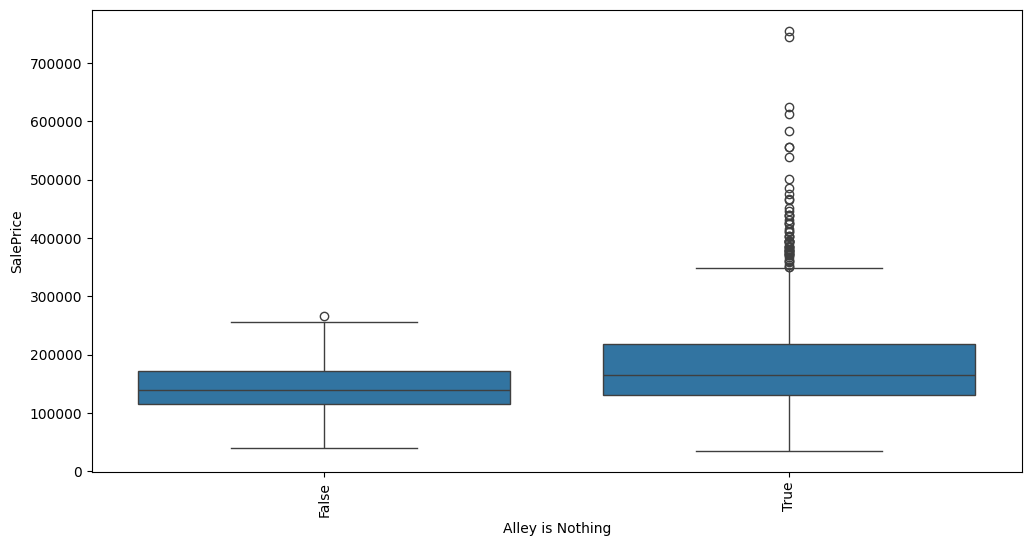

In [14]:
combine[0]['Alley']= combine[0]['Alley']=='Nothing'

plt.figure(figsize=(12, 6))
sns.boxplot(x='Alley', y='SalePrice', data=combine[0])
plt.xlabel('Alley is Nothing')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
for dataset in combine:
    dataset.drop('Alley', axis=1, inplace=True)

We can drop Fence

In [16]:
combine[0]['Fence'] = combine[0]['Fence'].fillna('No Fence')
combine[0].groupby(['Fence']).agg({'SalePrice':'mean','Fence':'size'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,Fence
Fence,,
No Fence,187596.837998,1179
GdPrv,178927.457627,59
MnPrv,148751.089172,157
GdWo,140379.314815,54
MnWw,134286.363636,11


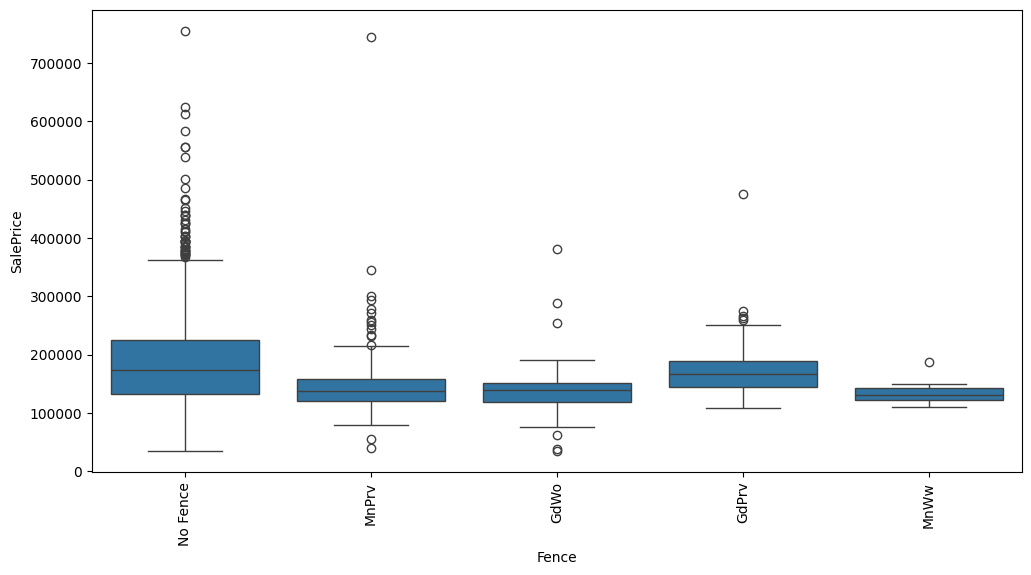

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fence', y='SalePrice', data=combine[0])
plt.xlabel('Fence')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [18]:
for dataset in combine:
    dataset.drop('Fence', axis=1, inplace=True)

In [19]:
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('No Fence')


combine[0].groupby(['MasVnrType']).agg({'SalePrice':'mean','MasVnrType':'size'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,MasVnrType
MasVnrType,,
Stone,265583.625000,128
BrkFace,204691.871910,445
No Fence,156958.243119,872
BrkCmn,146318.066667,15


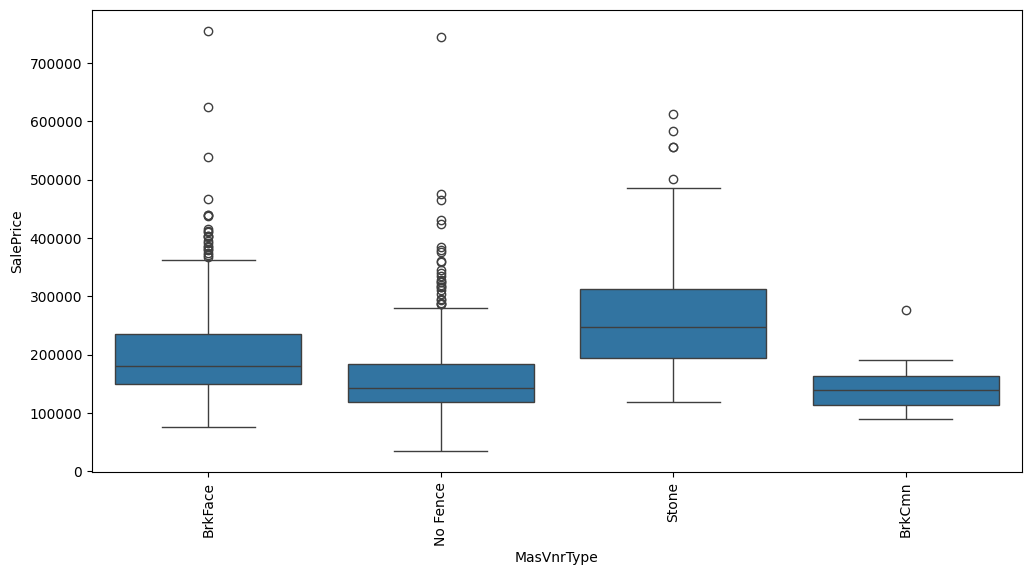

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MasVnrType', y='SalePrice', data=combine[0])
plt.xlabel('MasVnrType')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [21]:
MasVnrType_mapping = {"No Fence	": 0, "BrkCmn": 1, "BrkFace": 2, "Stone": 3}
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].map(MasVnrType_mapping)

In [22]:
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('No Fireplace')

combine[0].groupby(['FireplaceQu']).agg({'SalePrice':'mean','FireplaceQu':'size'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,FireplaceQu
FireplaceQu,,
Ex,337712.500000,24
Gd,226351.415789,380
TA,205723.488818,313
Fa,167298.484848,33
No Fireplace,141331.482609,690
Po,129764.150000,20


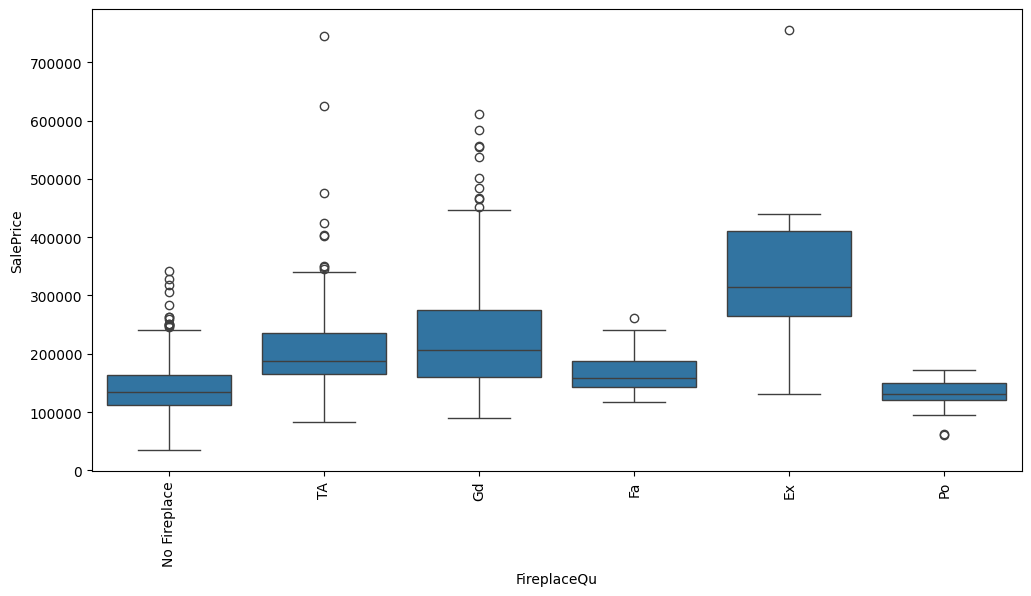

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=combine[0])
plt.xlabel('FireplaceQu')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [24]:
FireplaceQu_mapping = {"No Fireplace": 0, "Ex": 1}

for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].apply(lambda x: FireplaceQu_mapping.get(x,2))

In [25]:
for dataset in combine:
    dataset.drop('GarageCond', axis=1, inplace=True)
    dataset.drop('GarageFinish', axis=1, inplace=True)
    dataset.drop('GarageType', axis=1, inplace=True)

In [26]:
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].fillna('No Garage')

combine[0].groupby(['GarageQual']).agg({'SalePrice':'mean','GarageQual':'size'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,GarageQual
GarageQual,,
Ex,241000.000000,3
Gd,215860.714286,14
TA,187489.836003,1311
Fa,123573.354167,48
No Garage,103317.283951,81
Po,100166.666667,3


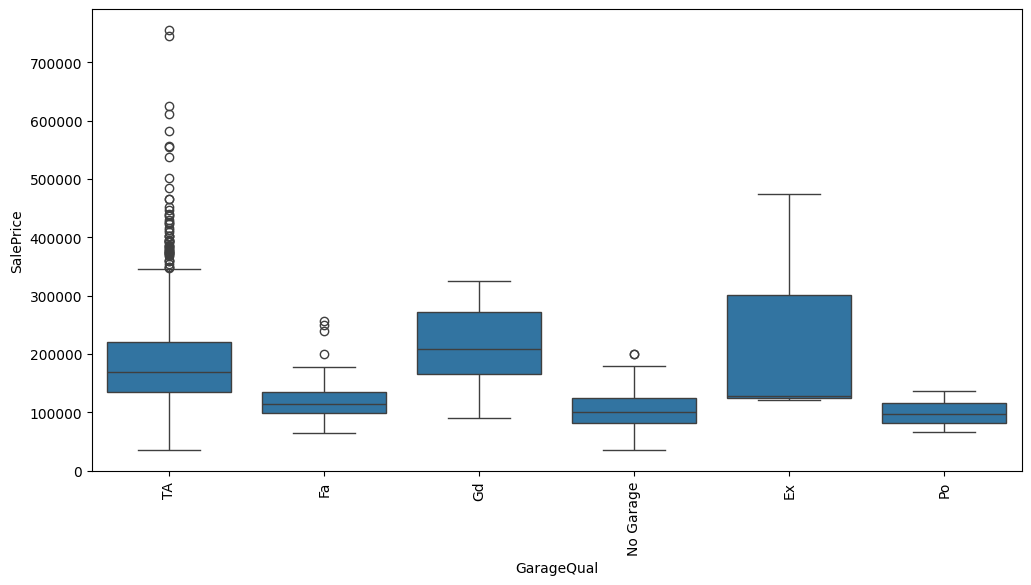

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GarageQual', y='SalePrice', data=combine[0])
plt.xlabel('GarageQual')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [28]:
GarageQual_mapping = {"No garage": 0, "Po": 0, "Fa": 0, "TA": 1, "Gd": 2, "Ex": 2}

for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].map(GarageQual_mapping)

String columns to drop because lazy to finish

In [29]:
columns_to_drop = [
    'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
    'Electrical', 'CentralAir', 'HeatingQC', 'Heating', 'KitchenQual',
    'Functional', 'PavedDrive', 'MSZoning', 'Foundation', 'Street',
    'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
    'ExterCond', 'SaleType', 'SaleCondition'
]

for dataset in combine:
    dataset = dataset.drop(columns=columns_to_drop, inplace=True)

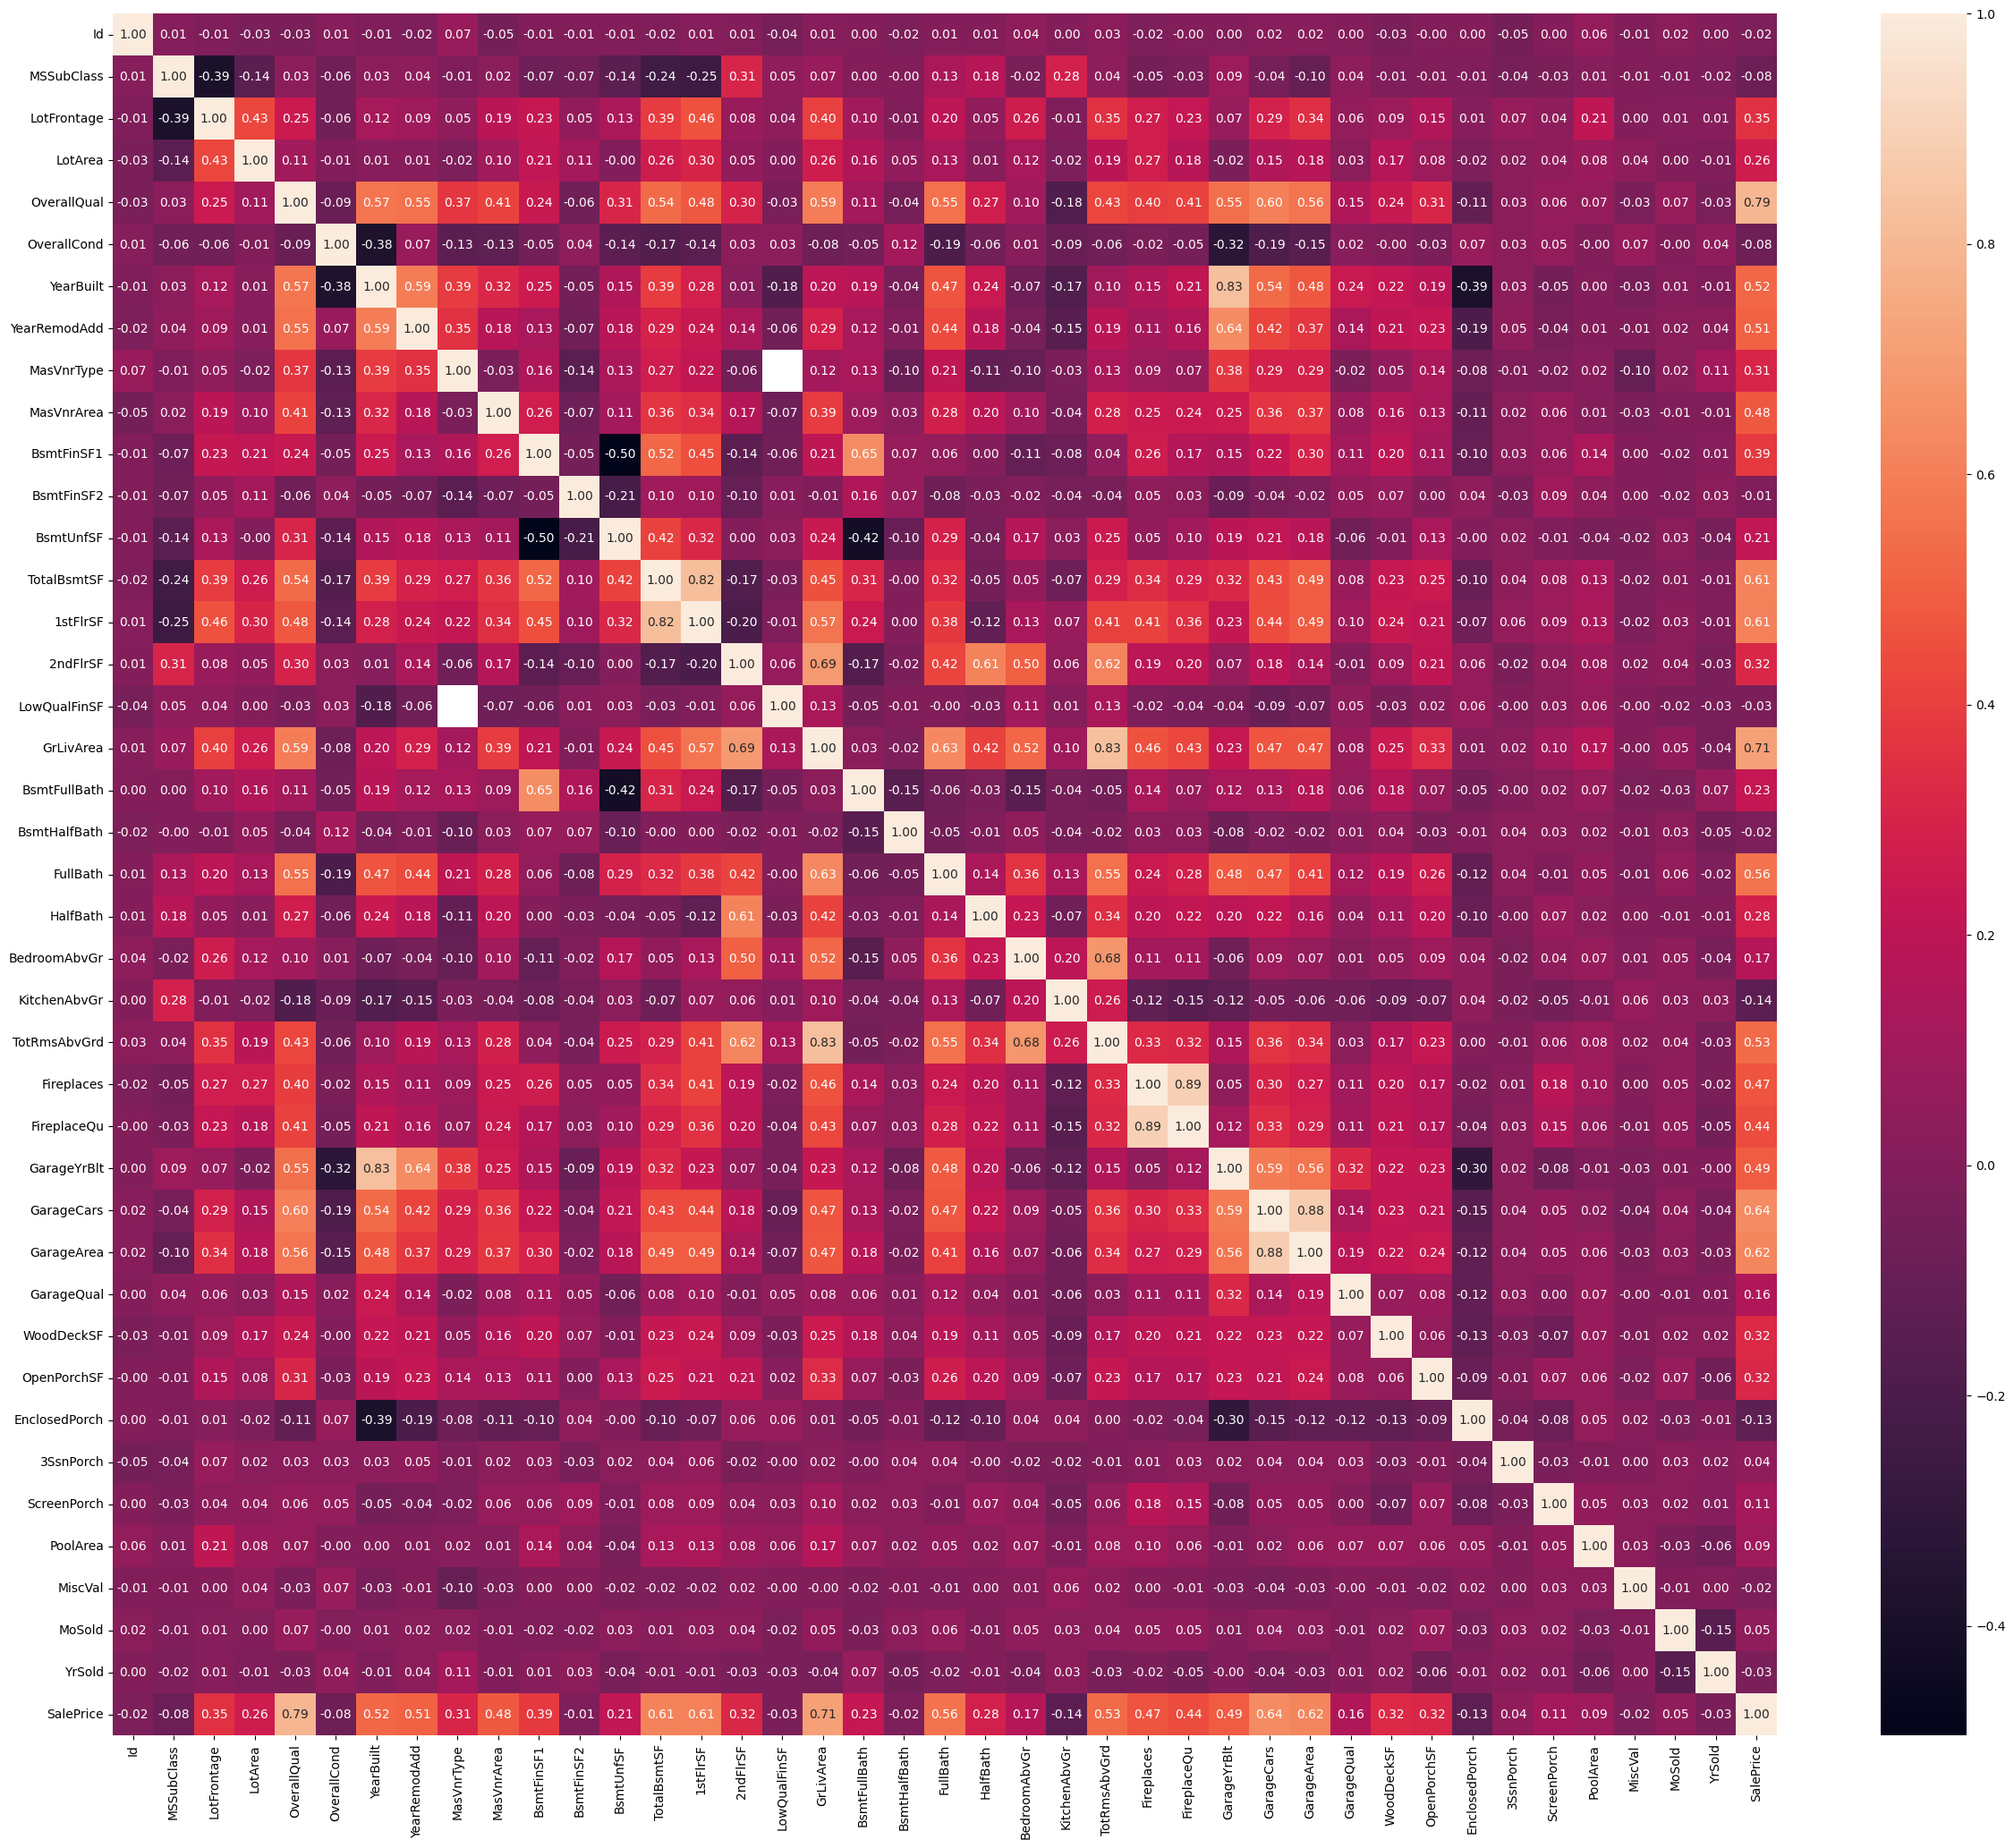

In [30]:
plt.figure(figsize=(30,25))
sns.heatmap(combine[0].corr(), annot=True, fmt='.2f')
plt.show()


In [31]:
corr_matrix = combine[0].corr()

selected_features = corr_matrix['SalePrice'][(corr_matrix['SalePrice'] > 0.5) | (corr_matrix['SalePrice'] < -0.5)].index.drop('SalePrice').tolist()

selected_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

# Regression Model

Preparing Data

In [32]:
X=combine[0][selected_features]
Y=combine[0]['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1022, 10), (1022,), (438, 10), (438,))

Standardizing the Data:

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Training the XGBoost Regressor:

In [34]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

# Train the model
xgboost_reg.fit(X_train, Y_train)

# Make predictions
Y_pred = xgboost_reg.predict(X_test)

# Calculate the accuracy or other relevant metrics
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {rmse}")

RMSE: 32284.58933913264


Preparing the Test Data for Prediction:

In [37]:
# Preparing the test data for prediction (combine[1])
X_test_final = combine[1].drop("Id", axis=1)  # Assuming the test set has the same features
X_test_final = X_test_final[selected_features]
X_test_final = sc_X.transform(X_test_final)    # Standardizing the test set features

# Predicting the fare amounts for the final test set
Y_final_pred = xgboost_reg.predict(X_test_final)

importance = xgboost_reg.feature_importances_
feature_importance = pd.DataFrame({'feature': selected_features, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

feature_importance

,feature,importance
0,OverallQual,0.635339
5,GrLivArea,0.078182
6,FullBath,0.066434
8,GarageCars,0.062107
4,1stFlrSF,0.041622
3,TotalBsmtSF,0.039464
2,YearRemodAdd,0.033883
9,GarageArea,0.018856
1,YearBuilt,0.015376
7,TotRmsAbvGrd,0.008738


Creating a Submission File:

In [36]:
# Creating a DataFrame with the "key" and predicted "fare_amount" column
submission = pd.DataFrame({
    "Id": combine[1]["Id"],
    "SalePrice": Y_final_pred
})

# Saving the DataFrame to a CSV file
submission.to_csv("submission.csv", index=False)